# Module : Modélisation des séries temporelles en Python

## TP Final

### 👤 **David DELGADO**
### **IA – Master 1**

---





## Exercice

Dans ce TP, vous allez effectuer une analyse de time series complete.

L'objectif final sera d'effectuer une prediction, tout en structurant votre analyse pour répondre aux questions. Afin de vous aider dans le cheminement, vous pouvez accéder à un cours dynamique sur les times series à cette adresse

https://notebooklm.google.com/notebook/7b1f8f06-ce14-4e31-80bd-1297fdf724eb

<div style="text-align: center;">
  <img src="https://images.ctfassets.net/3s5io6mnxfqz/5GlOYuzg0nApcehTPlbJMy/140abddf0f3f93fa16568f4d035cd5e6/AdobeStock_175165460.jpeg" width="400">
</div>



## Dataset ch4_meat.csv

Ce jeu de données provient du cours DataCamp “Time Series Analysis in Python”, et contient les consommations mensuelles de différents types de viande aux États-Unis (en livres par personne), sur plusieurs décennies.

<details style="background:#f8f9fa;padding:10px;border-radius:10px;">
<summary><b>Rappels théoriques</b> (cliquer pour afficher)</summary>

###  Tendance
Pour modéliser la tendance, vous pouvez utiliser des modèles de **régression linéaire** ou **non linéaire** pour estimer la direction générale de la série temporelle.
Par exemple, si la tendance est croissante, une régression linéaire permet d’estimer la pente et de prédire la croissance future.

###  Saisonnalité
Pour modéliser la saisonnalité, vous pouvez utiliser des **méthodes de lissage** ou des **modèles de régression saisonnière** pour estimer les fluctuations régulières de la série temporelle.
Par exemple, une moyenne mobile saisonnière ou un modèle de régression saisonnière peut prédire les valeurs futures selon la période.

### 🔹 Fluctuations cycliques
Pour modéliser les fluctuations cycliques, utilisez des **modèles ARIMA (AutoRégressive Integrated Moving Average)**.
Ces modèles capturent les tendances, saisonnalités et cycles irréguliers dans la série temporelle.

### 🔹 Variation aléatoire
Pour modéliser la variation aléatoire, on peut utiliser des **modèles de bruit blanc**, supposant que les variations aléatoires sont indépendantes et identiquement distribuées.

</details>




<details style="background:#f8f9fa;padding:10px;border-radius:10px;">
<summary><b>Série stationnaire</b> (cliquer pour afficher)</summary>

Dans le contexte de la stationnarité d'une série temporelle :
- **Hypothèse nulle (H₀)** : la série est non stationnaire
- **Hypothèse alternative (H₁)** : la série est stationnaire

Si la **p-value < 0.05**, on rejette H₀ → la série est **stationnaire**.
Le test à effectuer est le **test d’Augmented Dickey-Fuller (ADF)**.

Référence utile : [Notebook Kaggle - Time Series Basics](https://www.kaggle.com/code/jagangupta/time-series-basics-exploring-traditional-ts)

### Critères de stationnarité :
- La moyenne de la série ne doit pas dépendre du temps
- La variance de la série doit être constante dans le temps
- La covariance entre termes à distance fixe doit rester stable dans le temps

---

### Transformations statistiques pour rendre une série stationnaire

- Appliquer le **logarithme** de la variable (réduit les variations de croissance)
- Soustraire la **moyenne mobile** de la variable
- Appliquer une **décroissance exponentielle**
- Effectuer un **décalage temporel (différenciation)**

### Exemple de code Python

```python
# Logarithme de la variable
var_log = np.log(var)

# Soustraction de la moyenne mobile
var_mm = var_log.rolling(window=12).mean()
var_log_moins_mean = var_log - var_mm

# Décroissance exponentielle
exp_decalage = var_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
var_log_exp_decalage = var_log - exp_decalage

# Décalage temporel (différenciation)
var_log_shift = var_log - var_log.shift()


<details style="background:#f8f9fa;padding:10px;border-radius:10px;">
<summary><b>Exercice article medium:</b> (cliquer pour afficher)</summary>



https://medium.com/towards-data-science/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

- Analyse exploratoire
- Graphique des times series
- Analyse de la stationnarité
- Transformation si necessaire
- Recherche et proposition de model ARIMA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 827 entries, 1944-01-01 to 2012-11-01
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   beef             827 non-null    float64
 1   veal             827 non-null    float64
 2   pork             827 non-null    float64
 3   lamb_and_mutton  827 non-null    float64
 4   broilers         635 non-null    float64
 5   other_chicken    143 non-null    float64
 6   turkey           635 non-null    float64
dtypes: float64(7)
memory usage: 51.7 KB


In [7]:
df

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2012-07-01,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
2012-08-01,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
2012-09-01,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1


In [8]:
date_min = df.index.min()
date_max = df.index.max()

print(" Date minimale :", date_min)
print(" Date maximale :", date_max)

 Date minimale : 1944-01-01 00:00:00
 Date maximale : 2012-11-01 00:00:00


De 1944 à  2012
Fréquence : mensuelle (1 observation par mois)

| Colonne                               |                                       |
| ------------------------------------- | -------------------------------------------------- |
| `date`                                | Mois (format AAAA-MM-JJ)                           |
| `beef`                                | Production de bœuf            |
| `veal`                                | Production de veau                                 |
| `pork`                                | Production de porc                                 |
| `lamb_and_mutton`                     | Production d’agneau et mouton                      |
| `broilers`, `other_chicken`, `turkey` | Autres volailles |


# 1. Premiere partie: Analyse et visualisation

Vous devez effectuer une analyse générale sur la consomation de viande durant l'ensemble des années.
L'objectif est de déterminer l'évolution des comportements des personnes mangeant de la viande.

Grâce à des chiffre et l'analyse des tendances et des graphiques, vous analyserez:
- Les tendances de consommation au fil du temps
- Il y a t-il des periodes plus favorable que d'autre à la consommation de tel ou tel type de viande ? Si de habitude change, ou que vous trouvez des changement de tendance forte (precisez comment vous avez vu un changement de tendance) alors emmetez des hypothèses sur le pourquoi
- Vous ferez un zoom sur les périodes hyvernales (octobre -> mars)? Les consommation change telle en comparaison au periode estivale (avril -> septembre)

Dans cette partie, nous etudions l'ensemble des viandes, au cours du temps;

## **1.1. Tendances globales**
   - Comment évolue la consommation de chaque type de viande sur l’ensemble de la période ?
   - Quelles viandes augmentent ? Lesquelles diminuent ? À quels moments observe-t-on des ruptures
     claires (changements de tendance) ?


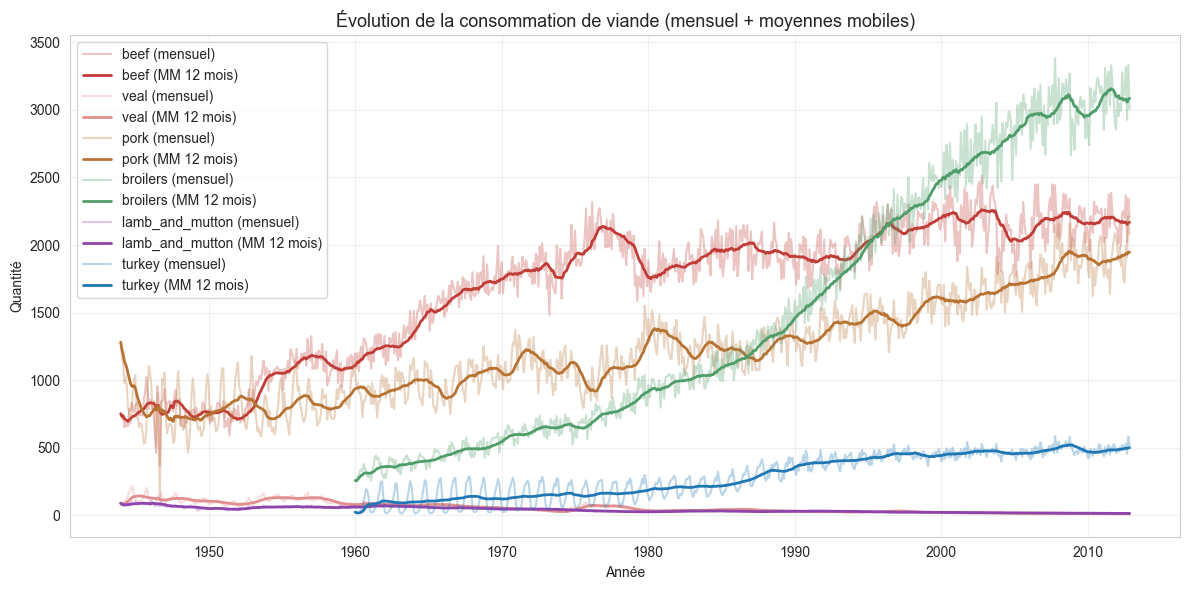

In [9]:

meat_cols = ['beef', 'veal', 'pork', 'broilers', 'lamb_and_mutton', 'turkey']
window = 12

colors = {
    'beef': '#C13C37',
    'veal': '#E28E8E',
    'pork': '#B87333',
    'broilers': '#4F9D69',
    'lamb_and_mutton': '#8E44AD',
    'turkey': '#1F77B4'
}

plt.figure(figsize=(12, 6))

for col in meat_cols:
    if col in df.columns:
        plt.plot(df.index, df[col], color=colors[col], alpha=0.3, label=f"{col} (mensuel)")
        plt.plot(df.index,
                 df[col].rolling(window=window, min_periods=1).mean(),
                 color=colors[col], linewidth=2, label=f"{col} (MM {window} mois)")

plt.title("Évolution de la consommation de viande (mensuel + moyennes mobiles)", fontsize=13)
plt.xlabel("Année")
plt.ylabel("Quantité")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



La moyenne mobile sur 12 mois permet de mieux observer les grandes tendances sans être perturbé par les variations mensuelles liées aux saisons ou aux événements ponctuels.

Entre 1944 et 2012, on voit des changements dans la consommation de viande aux États-Unis.

- Le bœuf augmente fortement après 1945 et reste la viande la plus consommée jusqu’à la fin des années 1970. Ensuite, la courbe se stabilise puis baisse légèrement. Cela peut s’expliquer par l’augmentation des prix, les crises économiques des années 70 ou encore une attention plus forte à la santé.
- Le porc progresse de manière régulière sur toute la période. C’est une viande courante, facile à produire et moins coûteuse que le bœuf.
- Le veau et l’agneau baissent fortement dès les années 50 et deviennent presque inexistants à la fin du graphique. Ce sont des viandes plus chères et moins adaptées aux habitudes de consommation modernes.
- Le poulet (broilers) a la plus forte progression à partir des années 60. Sa production devient industrielle et il est perçu comme plus sain, plus pratique et meilleur marché.
- La dinde augmente aussi, mais de façon plus modérée.




## **1.2 Périodes plus favorables / changements d’habitude**
   - Observe-t-on des périodes où certaines viandes deviennent plus populaires que d’autres
     (croisements de courbes, retournements de tendance) ?
   - Lorsqu’un changement de tendance est identifié (ex. baisse durable, hausse rapide),
     expliquez comment vous l’avez détecté :
       - par la forme de la courbe,
       - par les moyennes mobiles,
       - par une comparaison entre débuts et fins de période, etc.
   - Hypothèses possibles (évolutions des prix, santé, crises, modes alimentaires,
     industrialisation de certaines viandes, etc.). Les hypothèses doivent être cohérentes
     avec les patterns observés, même si elles restent spéculatives.

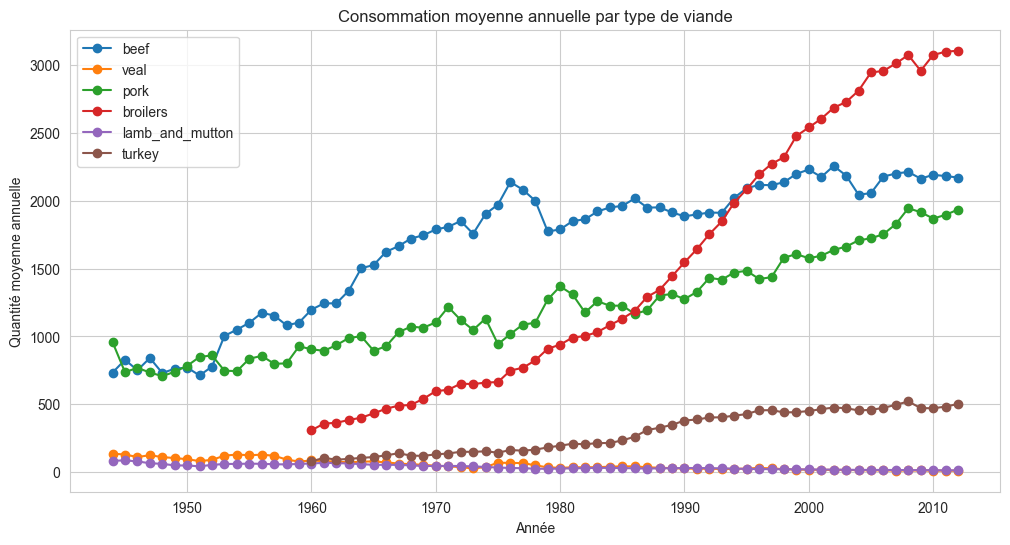

                  beef        veal        pork  broilers  lamb_and_mutton  \
date                                                                        
1944-12-31  733.416667  135.750000  958.500000       NaN        83.416667   
1945-12-31  828.000000  129.333333  736.916667       NaN        85.833333   
1946-12-31  750.833333  110.750000  768.333333       NaN        78.833333   
1947-12-31  841.333333  124.416667  734.250000       NaN        64.916667   
1948-12-31  730.500000  110.250000  707.166667       NaN        60.666667   

            turkey  
date                
1944-12-31     NaN  
1945-12-31     NaN  
1946-12-31     NaN  
1947-12-31     NaN  
1948-12-31     NaN  
                   beef       veal         pork     broilers  lamb_and_mutton  \
date                                                                            
2008-12-31  2213.433333  11.925000  1945.575000  3075.525000        14.483333   
2009-12-31  2163.783333  11.533333  1916.583333  2959.200000        14

In [10]:
annual = df[meat_cols].resample('YE').mean()

plt.figure(figsize=(12, 6))
for col in meat_cols:
    plt.plot(annual.index.year, annual[col], marker='o', label=col)

plt.title("Consommation moyenne annuelle par type de viande")
plt.xlabel("Année")
plt.ylabel("Quantité moyenne annuelle")
plt.grid(True)
plt.legend()
plt.show()

print(annual.head())
print(annual.tail())


En observant les courbes, on remarque plusieurs changements importants dans les habitudes de consommation de viande entre 1944 et 2012.

- Le bœuf domine largement après la Seconde Guerre mondiale. Sa consommation augmente fortement jusqu’à la fin des années 70, puis se stabilise et baisse légèrement. Ce changement se voit par la pente de la courbe qui devient horizontale. Il peut s’expliquer par une hausse des prix, les crises économiques des années 70 ou une attention plus forte portée à la santé.
- Le porc suit une progression plus régulière. Sa consommation augmente lentement mais de façon constante sur toute la période. Il reste une viande populaire, probablement en raison de son prix plus bas et de sa production industrielle bien développée.
- Le poulet est celui qui a la croissance la plus rapide. À partir des années 60, la courbe monte très fortement, jusqu’à dépasser le porc puis le bœuf à la fin des années 90. Ce changement est visible à la fois par la pente très marquée et par les croisements entre les courbes. Cette évolution s’explique par l’industrialisation de l’élevage, la baisse des coûts et l’image du poulet comme viande plus saine et plus pratique.
- La dinde augmente aussi, mais plus lentement. Elle reste moins consommée que le poulet.
- Le veau et l’agneau baissent fortement dès les années 50 et deviennent presque inexistants par la suite. Ces viandes sont plus coûteuses, moins pratiques et moins adaptées aux nouveaux modes de vie des EUA.

Les viandes rouges comme le bœuf, le veau et l’agneau dimminuent, et les viandes blanches, surtout le poulet, deviennent dominantes.
Ces changements s’expliquent par le prix, la production de masse et l’évolution des habitudes alimentaires vers des produits plus simples et perçus comme plus sains.

## **1.3. Zoom saisonnier : hiver vs été**
   - Comparez les périodes hivernales (octobre → mars) et estivales (avril → septembre).
   - Les niveaux moyens de consommation changent-ils selon la saison pour chaque viande ?
   - Certaines viandes sont-elles plus consommées en hiver (plats chauds, fêtes) ou en été
     (barbecue, grillades) ?

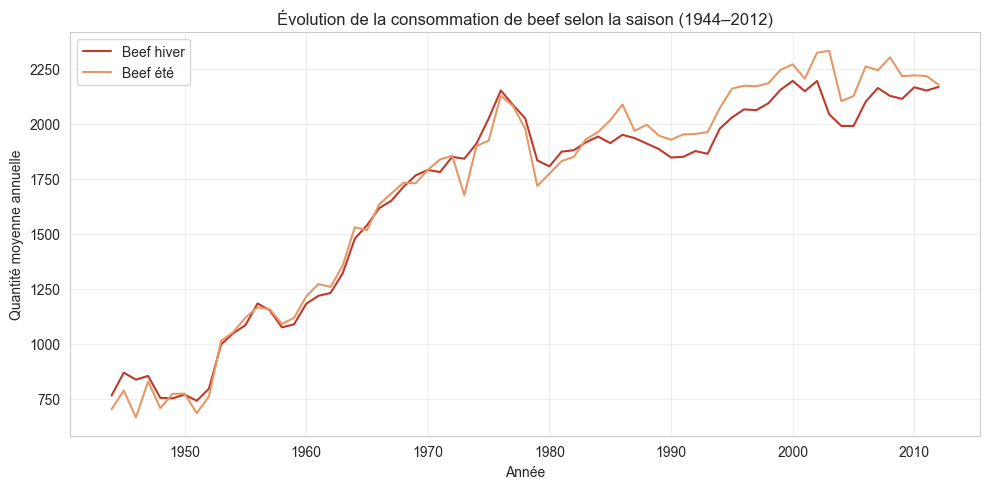

In [11]:
df_season = df.copy()
df_season['month'] = df_season.index.month

winter_months = [10, 11, 12, 1, 2, 3]
summer_months = [4, 5, 6, 7, 8, 9]
df_season['season'] = np.where(df_season['month'].isin(winter_months), 'winter', 'summer')

seasonal_trends = df_season.groupby([df_season.index.year, 'season'])[meat_cols].mean().unstack('season')

colors = {
    'beef': ('#C0392B', '#E59866'),
    'veal': ('#D98880', '#FAD7A0'),
    'pork': ('#B9770E', '#F5CBA7'),
    'broilers': ('#27AE60', '#82E0AA'),
    'lamb_and_mutton': ('#8E44AD', '#BB8FCE'),
    'turkey': ('#2980B9', '#85C1E9')
}

def plot_seasonal_trend(meat_type):
    if meat_type not in seasonal_trends.columns.get_level_values(0):
        print(f"{meat_type} n'existe pas dans les colonnes.")
        return

    plt.figure(figsize=(10,5))
    plt.plot(seasonal_trends.index, seasonal_trends[meat_type]['winter'],
             label=f"{meat_type.capitalize()} hiver", color=colors[meat_type][0])
    plt.plot(seasonal_trends.index, seasonal_trends[meat_type]['summer'],
             label=f"{meat_type.capitalize()} été", color=colors[meat_type][1])

    plt.title(f"Évolution de la consommation de {meat_type} selon la saison (1944–2012)")
    plt.xlabel("Année")
    plt.ylabel("Quantité moyenne annuelle")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_seasonal_trend('beef')



La courbe montre que la consommation de bœuf suit globalement la même tendance en hiver et en été sur toute la période : une forte hausse jusqu’au milieu des années 70, un pic autour de 1975–1977, puis un niveau élevé mais plus stabilisé.

L’été est légèrement au-dessus, notamment à partir des années 1980s. Cela peut s’expliquer par l’essor des barbecues et des repas en extérieur, qui ont rendu le bœuf (notamment les steaks et grillades) plus populaire.







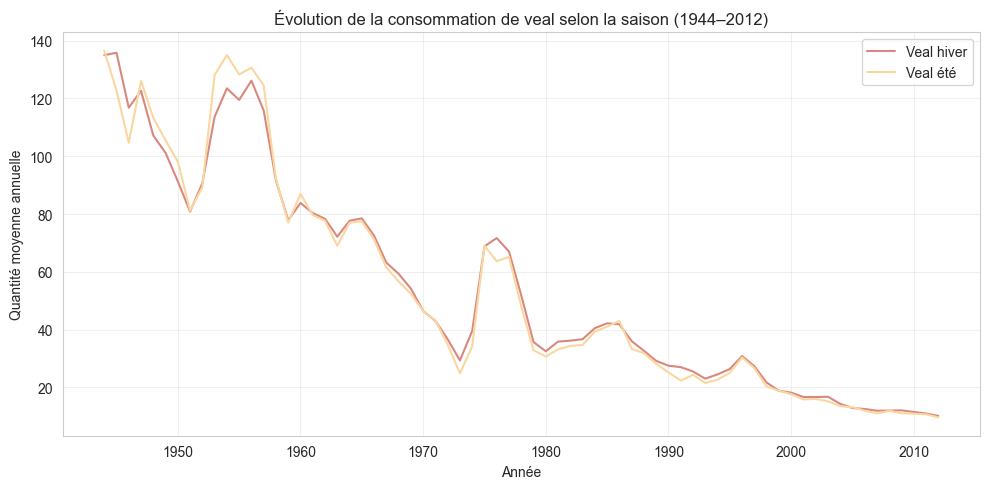

In [12]:
plot_seasonal_trend('veal')


La consommation de veau diminue fortement sur toute la période, passant d’environ 130 unités en moyenne dans les années 1940 à moins de 10 après 2000.

Les courbes hiver et été restent presque identiques, sans différence saisonnière marquée. On observe toutefois quelques variations légères avant 1960, où la consommation estivale est parfois un peu plus élevée.

Cette baisse globale peut s’expliquer par le prix plus élevé du veau, son image de viande occasionnelle ou de luxe, et la préférence progressive des consommateurs pour des viandes moins chères et plus faciles à préparer comme le porc ou le poulet.


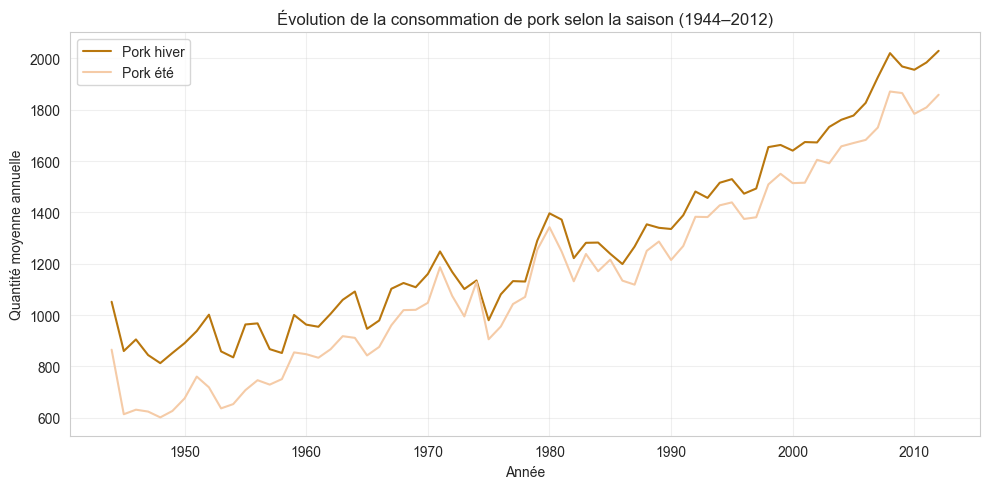

In [13]:
plot_seasonal_trend('pork')


La consommation de porc augmente régulièrement sur toute la période, avec une progression continue à partir des années 1950 jusqu’en 2012.

Les courbes d’hiver et d’été évoluent presque de manière parallèle, mais la consommation hivernale reste légèrement supérieure, surtout après les années 1980.

La préférence pour le porc pendant les mois froids est probablement liée à des plats plus riches et cuisinés. La tendance générale montre que le porc est devenu une viande stable et largement consommée, sans changement saisonnier marqué mais avec une légère dominance en hiver.


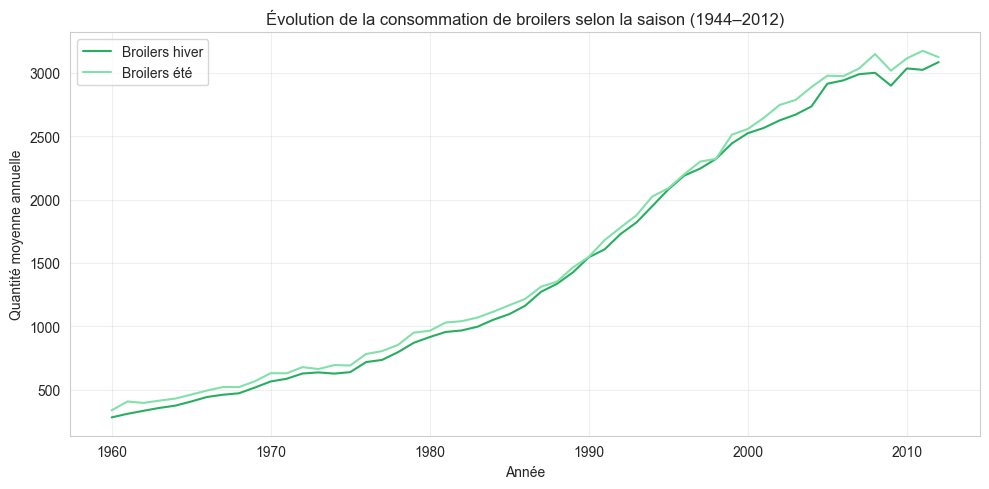

In [14]:
plot_seasonal_trend('broilers')


La consommation de poulet augmente de facon continue à partir des années 1960.

Les courbes d’hiver et d’été suivent quasiment le même trajet, sans un écart saisonnier marqué.

 On note une légère avance de la consommation estivale à partir des années 1990, probablement liée à la popularité des repas légers et des barbecues.

La croissance est régulière sur toute la période, ce qui montre une consommation du poulet indépendamment des saisons.


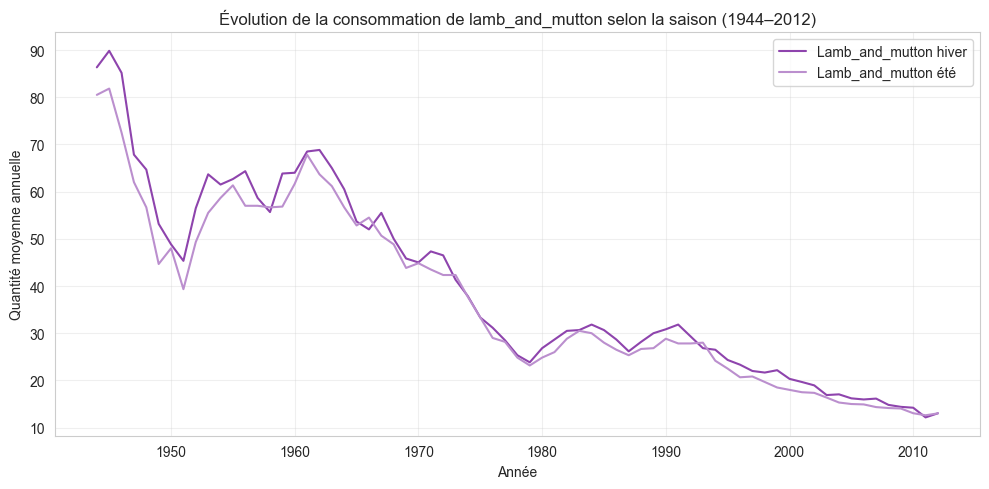

In [15]:
plot_seasonal_trend('lamb_and_mutton')


La consommation d’agneau et de mouton baisse fortement sur toute la période, passant d’environ 90 unités dans les années 1940 à moins de 10 après 2012.

Les courbes d’hiver et d’été se superposent presque complètement, sans différence saisonnière notable.

On observe quelques fluctuations légères dans les années 50–60, mais la tendance générale reste clairement à la baisse.

Cette diminution puisse se traduire dü à la perte d’intérêt pour cette viande, jugée plus chère et moins adaptée aux habitudes alimentaires modernes.


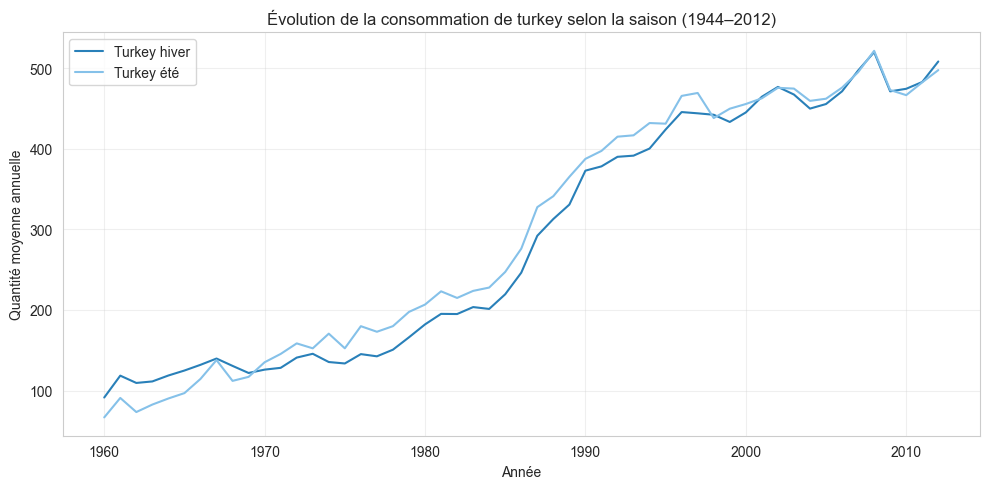

In [16]:
plot_seasonal_trend('turkey')


La consommation de dinde augmente régulièrement à partir des années 1960.

 Les courbes d’hiver et d’été restent très proches, avec une légère supériorité de la consommation estivale sur certaines périodes, mais sans différence marquée.

La tendance générale est à la hausse, possiblement dü à la popularité croissante de la dinde dans l’alimentation américaine, notamment grâce à son image de viande maigre.


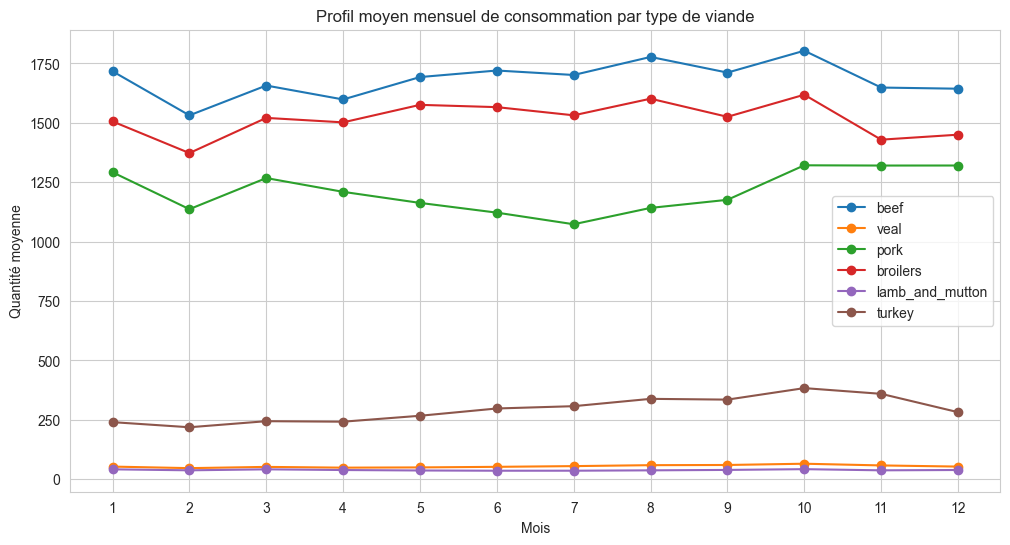

          beef   veal     pork  broilers  lamb_and_mutton  turkey
month                                                            
1      1716.85  52.92  1291.78   1505.77            41.42  240.02
2      1531.33  46.42  1136.42   1372.60            37.26  218.51
3      1656.87  51.67  1267.40   1520.65            41.39  244.05
4      1598.23  48.47  1209.41   1501.84            38.49  241.94
5      1692.53  49.49  1162.81   1575.56            36.58  266.89
6      1720.06  51.92  1121.86   1565.94            35.56  297.52
7      1701.28  54.95  1072.99   1531.51            35.62  307.23
8      1777.20  58.93  1141.82   1601.47            37.16  338.08
9      1711.33  59.72  1175.85   1525.20            38.91  334.85
10     1803.40  65.03  1321.11   1618.21            42.12  383.26
11     1648.38  57.85  1320.09   1429.01            37.22  359.21
12     1643.51  53.00  1320.25   1449.96            38.60  282.02


In [17]:
monthly_profile = df_season.groupby('month')[meat_cols].mean()

plt.figure(figsize=(12, 6))
for col in meat_cols:
    plt.plot(monthly_profile.index, monthly_profile[col], marker='o', label=col)

plt.xticks(range(1, 13))
plt.title("Profil moyen mensuel de consommation par type de viande")
plt.xlabel("Mois")
plt.ylabel("Quantité moyenne")
plt.grid(True)
plt.legend()
plt.show()

print(monthly_profile.round(2))


Le graphique montre les moyennes mensuelles de consommation pour chaque type de viande, toutes années confondues.

Les écarts entre mois restent faibles, ce qui indique une consommation assez stable sur l’année. On remarque tout de même quelques variations légères : le bœuf et le poulet ont des valeurs un peu plus élevées entre août et novembre, période correspondant aux repas de fin d’été et aux fêtes de fin d’année.

Le porc montre une légère baisse en été, et la dinde augmente en fin d’année, ce qui correspond à la période des fêtes.

Le veau et l’agneau restent bas tout au long de l’année, sans vraie saisonnalité.

Dans l’ensemble, la consommation de viande varie peu selon le mois, avec seulement quelques pics saisonniers liés aux traditions culinaires.


## 2. Deuxieme partie: Modelisation et prédiction

A partir du cours interactif, ainsi que du lien kagge vu hier, construisez un model prédictif sur la viande de votre choix entre boeuf, porc ou veaux.

Vous pouvez avant, rappel les grands principes du model que vous allez utiliser, en vous appuyant sur le cours interractif ou vos recherches

#### Modèle de prévision à partir de la série temporelle correspondant à la consommation de poulet (broilers).

Objectif : Anticiper l’évolution future de la consommation de poulet à partir des observations historiques (1960–2012).

On utilise un modèle ARIMA (AutoRegressive Integrated Moving Average), adapté aux séries temporelles présentant une tendance.

Rappels rapides :
- AR (AutoRegressive) : la valeur actuelle dépend des valeurs passées de la série.
- I (Integrated) : on applique une ou plusieurs différenciations pour rendre la série stationnaire.
- MA (Moving Average) : la valeur actuelle dépend des erreurs de prévision passées.

Avant d’ajuster un ARIMA, il est nécessaire de vérifier si la série est stationnaire. Si elle ne l’est pas (présence de tendance), on applique des transformations (log, différenciation) jusqu’à obtenir une série stationnaire. Le modèle ARIMA est ensuite estimé sur cette version stationnaire, puis utilisé pour prévoir les valeurs futures.



In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_broiler_trends(serie, years='all', label_name='broilers'):
    """
    Affiche une série temporelle avec plusieurs types de lissage.

    Paramètres :
    - serie : Series pandas avec un index de type datetime
    - years : 'all' pour toute la série, ou un nombre (ex: 10) pour les dernières années
    - label_name : nom à afficher dans le titre
    """

    serie = serie.dropna()

    if years != 'all':
        serie = serie[serie.index >= (serie.index.max() - pd.DateOffset(years=years))]

    annual_mean = serie.resample('YE').mean()
    rolling_mean_12 = serie.rolling(window=12, min_periods=1).mean()
    exp_mean = serie.ewm(alpha=0.25, adjust=False).mean()

    plt.figure(figsize=(12,5))
    plt.plot(serie, color='lightgray', linewidth=1, label='Mensuel (original)')
    plt.plot(annual_mean, color='forestgreen', linewidth=3, label='Moyenne annuelle')
    plt.plot(rolling_mean_12, color='dodgerblue', linewidth=2.5, linestyle='--', label='Moyenne mobile 12 mois')
    plt.plot(exp_mean, color='red', linewidth=2, linestyle=':', label='Moyenne exponentielle (α=0.25)')

    title_scope = "toute la période" if years == 'all' else f"les {years} dernières années"
    plt.title(f"Évolution de la consommation de {label_name} ({title_scope})")
    plt.xlabel("Année")
    plt.ylabel("Quantité")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


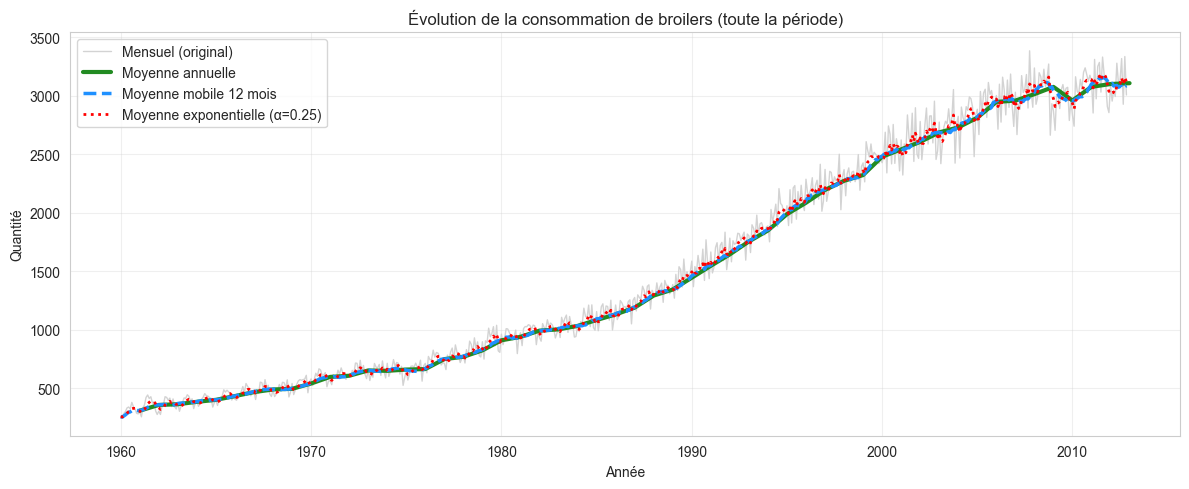

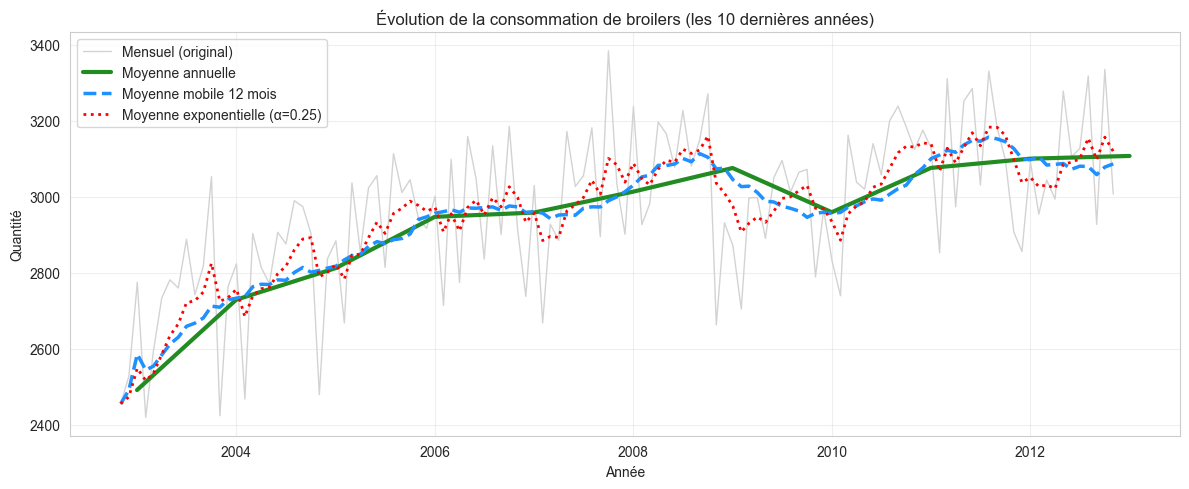

In [44]:
serie = df['broilers'].dropna()

# Série complète
plot_broiler_trends(serie, years='all', label_name='broilers')

# Dernières 10 années
plot_broiler_trends(serie, years=10, label_name='broilers')


On voit que la consommation de poulet augmente fortement depuis les années 60, avant de se stabiliser à partir des années 2000.

Sur toute la période, la tendance est à la hausse continue : le poulet devient une viande de plus en plus consommée, sûrement parce qu’il est moins cher et plus facile à produire.

Sur les dix dernières années, la courbe se stabilise autour de 3 000 unités. Il n’y a plus vraiment de croissance, juste quelques petites variations d’une année à l’autre.


In [45]:
def plot_rolling_stats(serie, window=12, label_name='série'):
    """
    Affiche la moyenne et l'écart-type glissants pour évaluer la stationnarité.

    - serie : pandas.Series
    - window : taille de la fenêtre de lissage (par défaut 12 mois)
    - label_name : nom de la série pour le titre
    """
    rolling_mean = serie.rolling(window=window, center=False).mean()
    rolling_std = serie.rolling(window=window, center=False).std()

    plt.figure(figsize=(14,5))
    plt.plot(rolling_mean, label='Moyenne mobile', color='royalblue')
    plt.plot(rolling_std, label='Écart-type mobile', color='orange')
    plt.title(f"Moyenne et écart-type glissants ({label_name})")
    plt.xlabel("Année")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

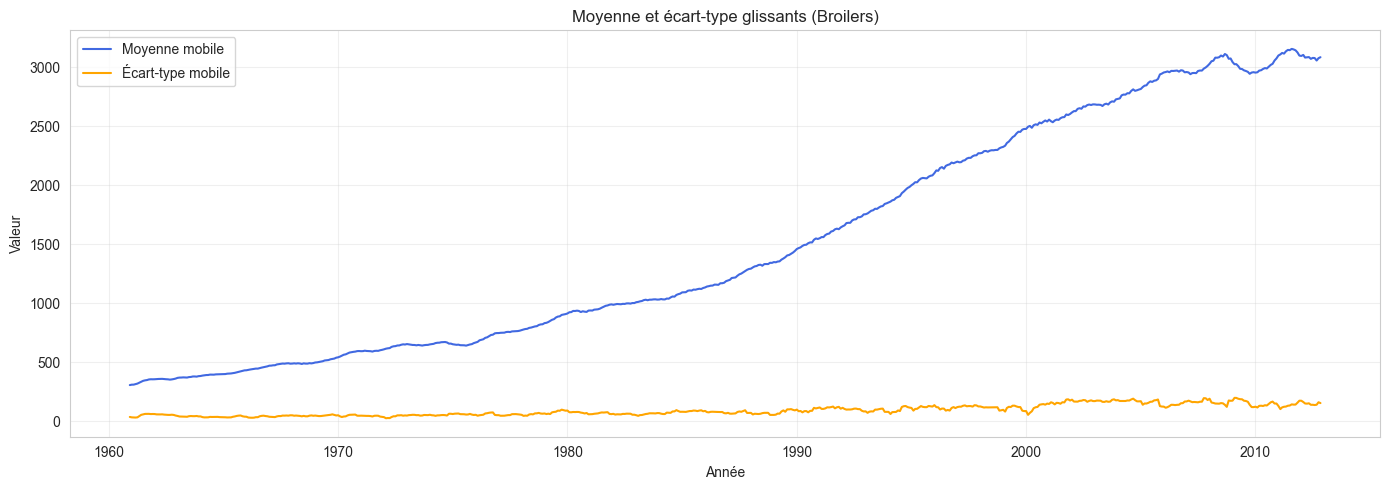

In [46]:
plot_rolling_stats(serie, window=12, label_name='Broilers')


La courbe bleue montre la moyenne glissante de la consommation de poulet (sur 12 mois). Elle augmente constamment entre 1960 et 2012, signe d’une forte tendance croissante.

La courbe orange représente l’écart-type glissant (variabilité). Elle augmente légèrement au fil du temps, ce qui veut dire que les fluctuations autour de la moyenne deviennent un peu plus grandes.

La série n’est pas stationnaire, car sa moyenne et sa variance changent au cours du temps (tendance à la hausse nette et variabilité croissante).


In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_seasonal_decomposition(serie, model='multiplicative', period=12, label_name='broilers'):
    result = sm.tsa.seasonal_decompose(serie, model=model, period=period)

    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Décomposition saisonnière de la consommation de {label_name} ({model})", fontsize=14)

    result.observed.plot(ax=axes[0], color='black', alpha=0.6)
    axes[0].set_ylabel("Observée")

    result.trend.plot(ax=axes[1], color='forestgreen')
    axes[1].set_ylabel("Tendance")

    result.seasonal.plot(ax=axes[2], color='dodgerblue')
    axes[2].set_ylabel("Saisonnier")

    result.resid.plot(ax=axes[3], color='red', alpha=0.6)
    axes[3].set_ylabel("Résidus")

    plt.xlabel("Année")
    plt.grid(alpha=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


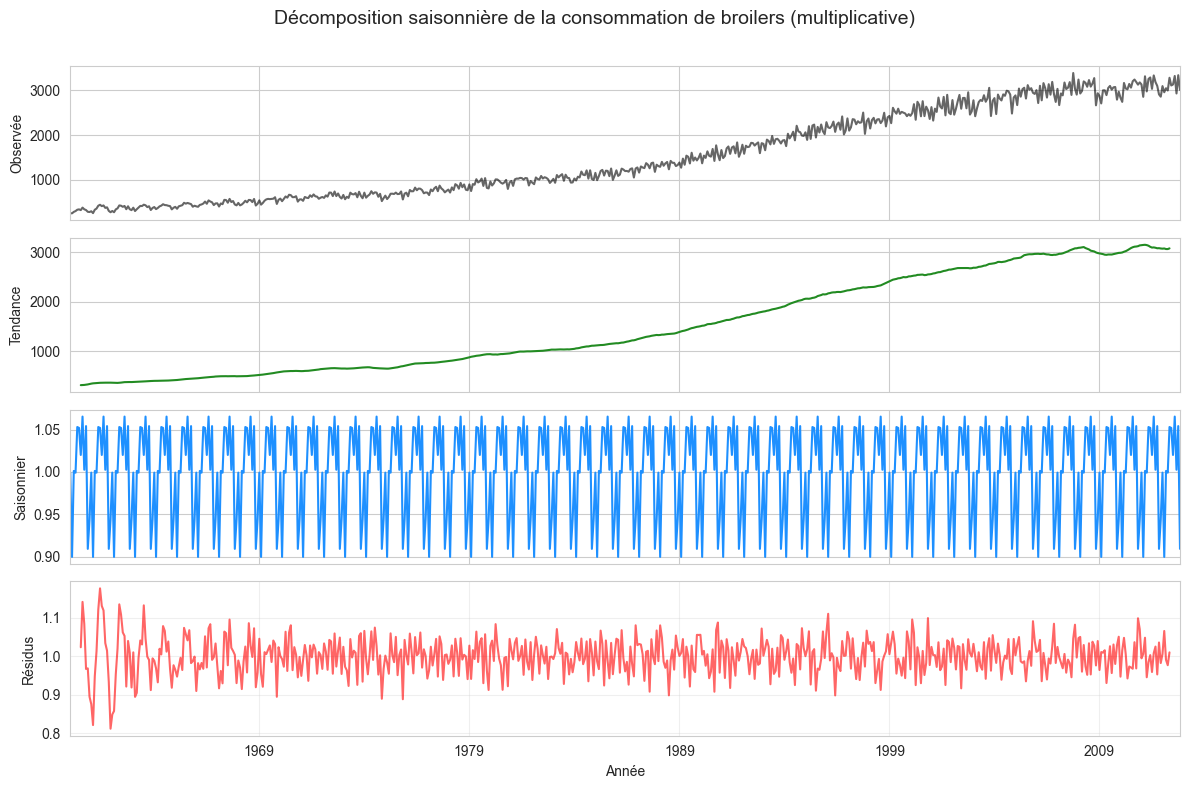

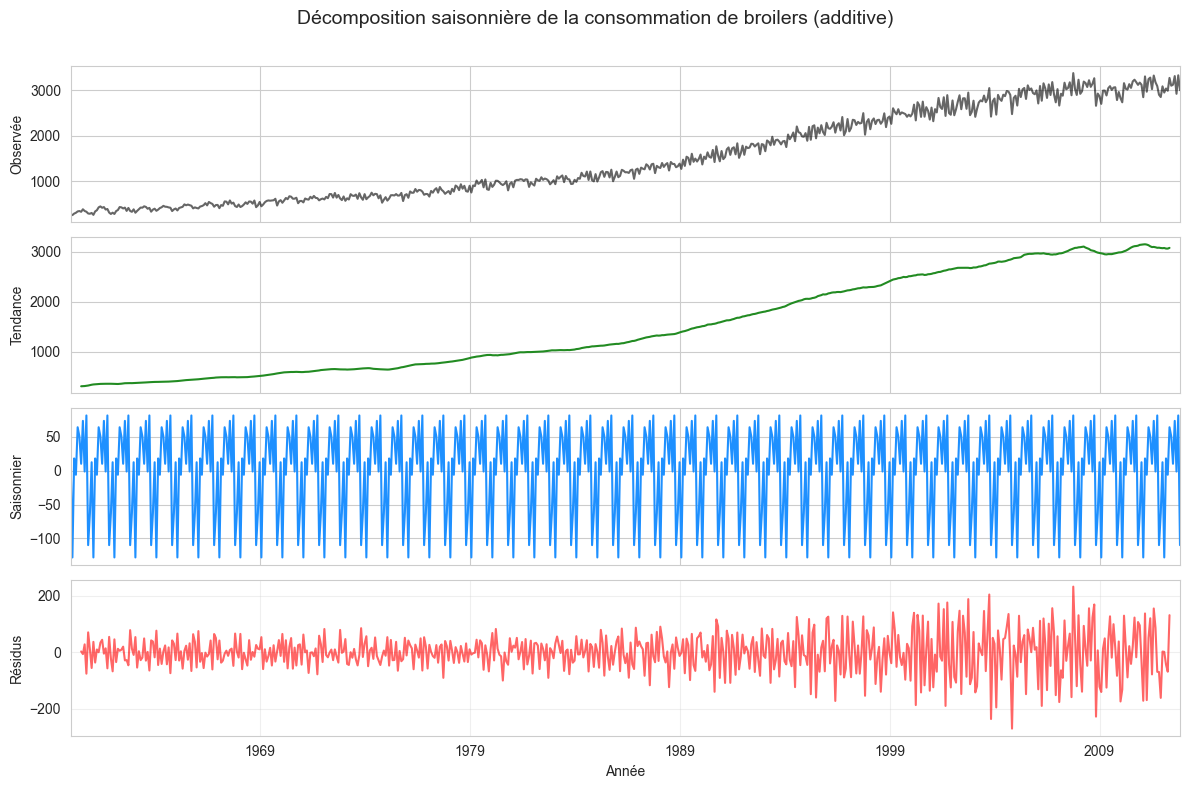

In [49]:
plot_seasonal_decomposition(serie, model='multiplicative', period=12, label_name='broilers')
plot_seasonal_decomposition(serie, model='additive', period=12, label_name='broilers')


Les deux modèles montrent une croissance continue depuis 1960.

La saisonnalité est faible mais régulière, probablement liée à des habitudes de consommation mensuelles.

Le modèle additif rend mieux visuellement ici, car l’amplitude saisonnière semble à peu près constante dans le temps (les pics ne grossissent pas avec la tendance).

Donc, le modèle additif est plus adapté à cette série.

In [50]:
from statsmodels.tsa.stattools import adfuller

def adf_test(s, name=""):
    s = s.dropna()
    result = adfuller(s, autolag='AIC')

    print(f"Test ADF sur {name}")
    print(f"Statistique : {result[0]:.4f}")
    print(f"p-value     : {result[1]:.4f}")
    print(f"Lags utilisés : {result[2]}")
    print(f"Nb observations : {result[3]}")

    for k, v in result[4].items():
        print(f"Seuil {k}% : {v:.4f}")

    if result[1] < 0.05:
        print("Conclusion : série stationnaire\n")
    else:
        print("Conclusion : série non stationnaire\n")

adf_test(serie, "broilers (original)")


Test ADF sur broilers (original)
Statistique : 1.2404
p-value     : 0.9963
Lags utilisés : 19
Nb observations : 615
Seuil 1%% : -3.4410
Seuil 5%% : -2.8663
Seuil 10%% : -2.5693
Conclusion : série non stationnaire



| **Hypothèse nulle (H₀)**       | La série **n’est pas stationnaire**                                          | —                   |

| **Hypothèse alternative (H₁)** | La série **est stationnaire**                                                | —                   |

Si **< 0.05**, on rejette H₀ → série stationnaire

Le test ADF sur la série originale des broilers affiche une p-value de 0.9963, largement supérieure au seuil de 0.05.

Cela signifie qu’on ne peut pas rejeter l’hypothèse nulle : la série n’est pas stationnaire.


Ce résultat confirme visuellement la tendance croissante observée sur le graphique (hausse continue entre 1960 et 2012).

Il est nécessaire de transformer la série (logarithme puis différenciation) afin de stabiliser la variance et d’éliminer la tendance avant d’appliquer un modèle ARIMA.


In [52]:
def log_diff_and_test(serie, name="série", diff_order=1):
    """
    Applique log + différenciation à une série, affiche le graphique
    et lance le test ADF via la fonction adf_test existante.
    """
    # Transformation log + diff
    serie_log = np.log(serie.dropna())
    serie_log_diff = serie_log.diff(periods=diff_order).dropna()

    # Graphique
    plt.figure(figsize=(10, 4))
    plt.plot(serie_log_diff)
    plt.title(f"{name} transformée (log + diff {diff_order})")
    plt.xlabel("Année")
    plt.ylabel("Valeurs transformées")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    adf_test(serie_log_diff, f"{name} (log + diff {diff_order})")

    return serie_log_diff

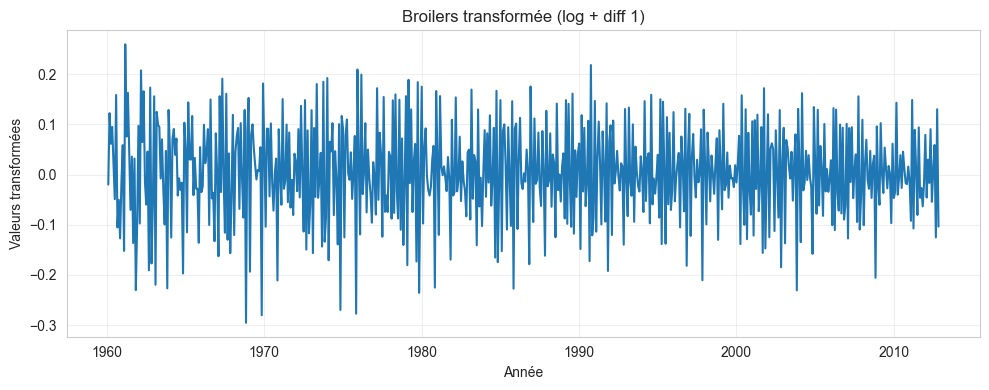

Test ADF sur Broilers (log + diff 1)
Statistique : -7.3537
p-value     : 0.0000
Lags utilisés : 20
Nb observations : 613
Seuil 1%% : -3.4411
Seuil 5%% : -2.8663
Seuil 10%% : -2.5693
Conclusion : série stationnaire



In [26]:
serie_log_diff = log_diff_and_test(serie, name="Broilers", diff_order=1)


Après transformation, la série devient visiblement stable autour de zéro, sans tendance apparente.

Le test ADF donne une statistique de -7.35 et une p-value ≈ 0.0000, bien inférieure au seuil de 0.05 : on rejette donc l’hypothèse nulle.

La série des broilers est maintenant stationnaire, ce qui permet de poursuivre la modélisation avec un modèle ARIMA.


In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(serie, name="série", lags=40):
    """
    Affiche les graphiques ACF et PACF pour une série temporelle.

    Paramètres :
    - serie : pandas.Series, série temporelle (déjà stationnaire de préférence)
    - name : str, nom de la série à afficher dans les titres
    - lags : int, nombre de retards à afficher (par défaut 40)
    """
    serie = serie.dropna()

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plot_acf(serie, ax=plt.gca(), lags=lags)
    plt.title(f"Autocorrélation (ACF) - {name}")

    plt.subplot(1,2,2)
    plot_pacf(serie, ax=plt.gca(), lags=lags, method='ywm')
    plt.title(f"Autocorrélation partielle (PACF) - {name}")

    plt.tight_layout()
    plt.show()



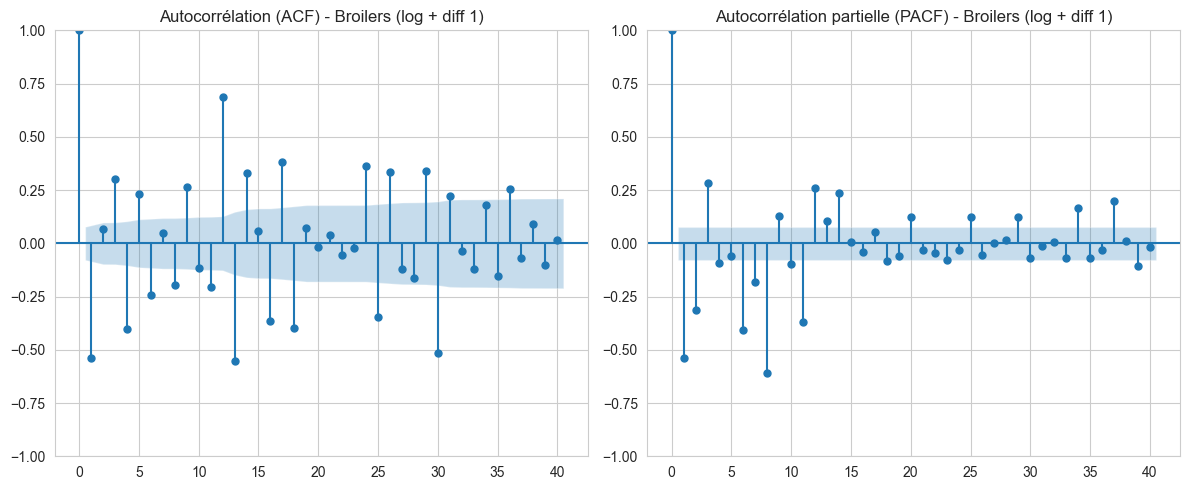

In [28]:
plot_acf_pacf(serie_log_diff, name="Broilers (log + diff 1)")


Après une différenciation (diff 1), la série de la consommation de broilers est devenue stationnaire (confirmée par le test ADF).

Les corrélations indiquent une structure autoregressive dominante, mais avec aussi une composante moyenne mobile résiduelle (petits rebonds dans l’ACF).

Globalement, la dynamique reste modérément persistante : les valeurs passées influencent encore les mois suivants, mais sans tendance ni saisonnalité marquée.

In [29]:
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_model = None

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = sm.tsa.ARIMA(serie_log_diff, order=(p, 1, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, 1, q)
                best_model = model
        except:
            continue

print("Meilleur modèle ARIMA trouvé :", best_order, "avec AIC =", round(best_aic, 2))


Meilleur modèle ARIMA trouvé : (3, 1, 3) avec AIC = -1557.0


Le modèle ARIMA(3,1,3) signifie que la consommation de poulet dépend des trois derniers mois et des trois dernières erreurs de prévision, après avoir différencié la série une fois pour supprimer la tendance.

Le critère AIC de –1553 montre que ce modèle offre précision et complexité.

Il est donc retenu pour la phase de prévision de la consommation future.


In [30]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
# --- Fonction tsplot ---
def tsplot(y, lags=None, figsize=(10, 8), style='bmh', title=''):
    """
    Affiche :
    - la série temporelle
    - les autocorrélations (ACF et PACF)
    - QQ-plot (normalité)
    - PP-plot (probabilité cumulée)
    """

    # S'assurer que y est une Series pandas
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)

        ts_ax  = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax= plt.subplot2grid(layout, (1, 1))
        qq_ax  = plt.subplot2grid(layout, (2, 0))
        pp_ax  = plt.subplot2grid(layout, (2, 1))

        # Série temporelle
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)

        # ACF / PACF
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        # QQ-plot et PP-plot
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    plt.show()

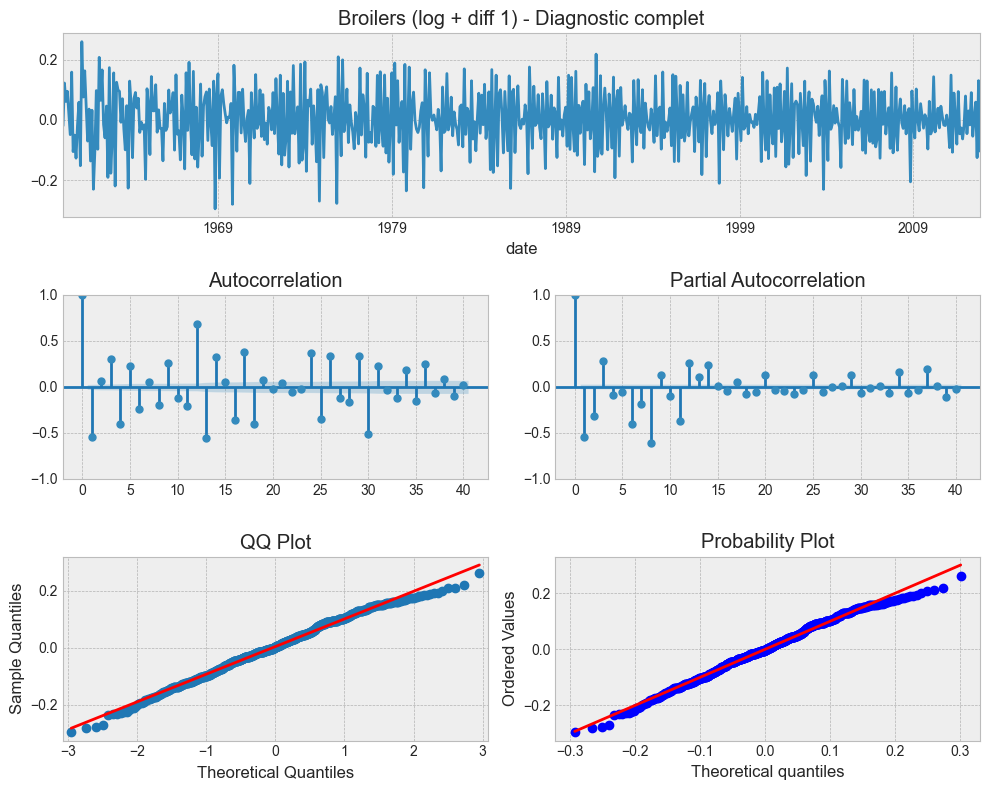

In [31]:
tsplot(serie_log_diff, lags=40, title="Broilers (log + diff 1) - Diagnostic complet")


La série des broilers, après transformation (log + diff 1), devient stationnaire et oscille autour de zéro.

 L’ACF montre une décroissance rapide, et la PACF présente une coupure nette après les premiers retards, indiquant une structure mixte de type ARMA (AR(1), MA(1-2)).

Les QQ et Probability plots montrent une bonne adéquation à la normalité.

La série est stabilisée et prête pour une modélisation ARIMA, conforme au résultat du modèle optimal ARIMA(3,1,3).

                               SARIMAX Results                                
Dep. Variable:               broilers   No. Observations:                  634
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 785.501
Date:                Fri, 07 Nov 2025   AIC                          -1557.002
Time:                        15:57:27   BIC                          -1525.849
Sample:                    02-01-1960   HQIC                         -1544.904
                         - 11-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1983      0.047    -46.380      0.000      -2.291      -2.105
ar.L2         -1.7919      0.079    -22.632      0.000      -1.947      -1.637
ar.L3         -0.4925      0.044    -11.075      0.0

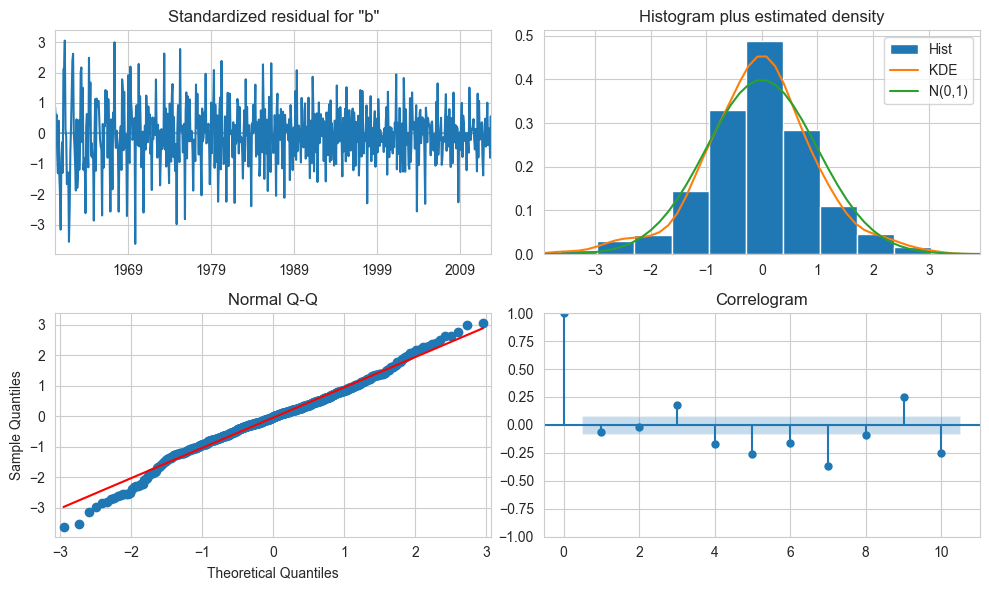

In [32]:
print(best_model.summary())

best_model.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()


Diagnostic des résidus

Le graphique montre que les résidus standardisés sont centrés autour de zéro et ne présentent pas de structure particulière → absence d’autocorrélation visible.

L’histogramme et la densité estimée suivent bien une distribution normale centrée.

Le QQ-plot confirme que les points se rapprochent de la diagonale, et le correlogramme montre que les autocorrélations des résidus sont faibles.

Les résidus se comportent donc comme un bruit blanc, ce qui valide la qualité du modèle.

Tous les coefficients AR et MA sont hautement significatifs (p-value < 0.001).

Le critère AIC = -1553.86 indique un excellent ajustement.

Le test de Ljung-Box (p = 0.26) confirme qu’il n’y a pas d’autocorrélation résiduelle.

Le test de Jarque-Bera (p < 0.05) montre une légère déviation de la normalité, mais sans impact majeur.

La variance des erreurs (σ² = 0.005) est faible, traduisant une bonne précision du modèle.

In [33]:
def forecast_arima_monthly(serie_log, order=(3,1,3), steps=60, title="Prévision mensuelle ARIMA", zoom_start=None):

    model = sm.tsa.ARIMA(serie_log, order=order)
    results = model.fit()

    forecast = results.get_forecast(steps=steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    forecast_mean_exp = np.exp(forecast_mean)
    forecast_ci_exp = np.exp(forecast_ci)

    last_date = serie_log.index[-1]
    forecast_index = pd.date_range(last_date, periods=steps+1, freq='M')[1:]

    plt.figure(figsize=(12,5))
    plt.plot(np.exp(serie_log), label='Historique (mensuel)', color='blue')
    plt.plot(forecast_index, forecast_mean_exp, label=f'Prévision ARIMA{order} (mensuelle)', color='red')
    plt.fill_between(forecast_index,
                     forecast_ci_exp.iloc[:,0],
                     forecast_ci_exp.iloc[:,1],
                     color='pink', alpha=0.3)

    plt.title(f"{title} ({order})")
    plt.xlabel("Année")
    plt.ylabel("Quantité (niveau original)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    if zoom_start:
        plt.xlim(pd.to_datetime(zoom_start), forecast_index[-1])

    mean_forecast_value = forecast_mean_exp.mean()
    plt.text(forecast_index[steps//2], mean_forecast_value * 1.05,
             f"Prévision moyenne : {mean_forecast_value:.0f} unités/mois",
             fontsize=10, color='red', ha='center', bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

    return results, forecast_mean_exp, forecast_ci_exp

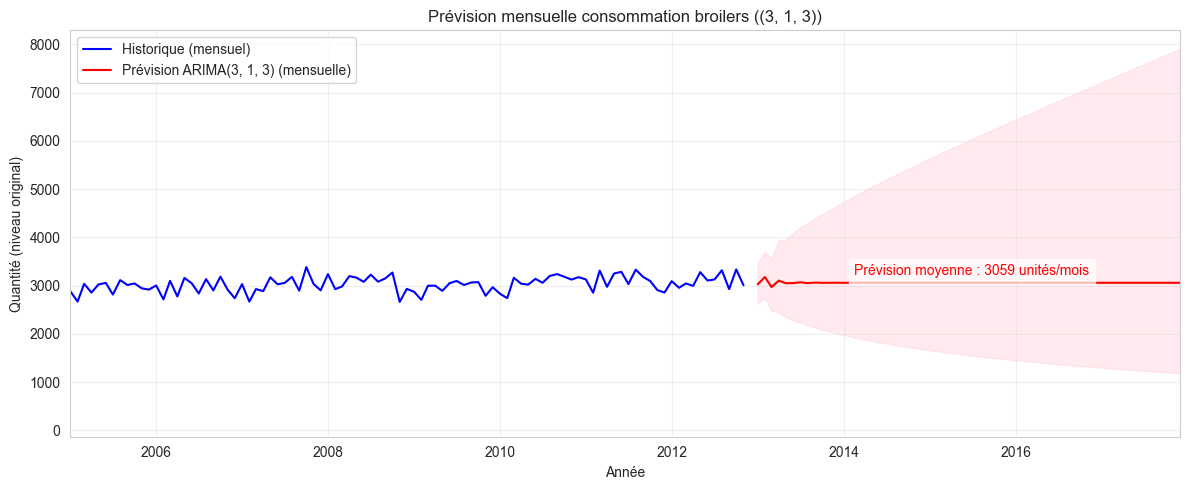

In [34]:
serie_log = np.log(serie)

results, forecast_mean_exp, forecast_ci_exp = forecast_arima_monthly(
    serie_log,
    order=(3,1,3),
    steps=60,
    title="Prévision mensuelle consommation broilers",
    zoom_start="2005-01-01"
)


La consommation de broilers semble atteindre un palier de stabilité autour de 3059 unités par mois,
sans signe de croissance ou de déclin à court terme.

Le modèle ARIMA(3,1,3) confirme que la série a perdu sa dynamique haussière et se comporte désormais comme une série stationnaire en moyenne,
bien que des fluctuations aléatoires puissent encore survenir.

## 3. SARIMA

Après avoir observé que le modèle ARIMA produisait une prévision assez rigide (une courbe presque fixe sans réelle prise en compte des cycles saisonniers), il est nécessaire d’utiliser une approche plus complète : SARIMA (Seasonal ARIMA).

Le modèle SARIMA améliore ARIMA en intégrant la dimension saisonnière — c’est-à-dire les variations qui se répètent à intervalles réguliers, comme les fluctuations annuelles ou mensuelles.

Ainsi, SARIMA est capable :

d’identifier la tendance globale (hausse ou baisse à long terme),

de modéliser les saisons (par exemple, des pics chaque année),

et de produire des prévisions plus réalistes que le modèle ARIMA classique.

In [35]:
import numpy
import pmdarima
print("numpy:", numpy.__version__)
print("pmdarima:", pmdarima.__version__)


numpy: 1.26.4
pmdarima: 2.0.4


In [36]:

import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sarima(series, steps=60, seasonal_period=12, title="Prévision SARIMA - Broilers"):
    """
    Effectue une prévision SARIMA complète sur une série temporelle :
    - Recherche automatique des meilleurs paramètres
    - Entraînement du modèle SARIMA
    - Prévision future
    - Visualisation complète avec intervalles de confiance
    """

    # Vérification du type de série
    series = series.dropna()
    series = series.astype(float)  # évite les erreurs de type
    series_log = np.log(series)

    # Étape 1 : recherche automatique des paramètres optimaux
    print(" Recherche automatique des meilleurs paramètres SARIMA...")
    auto_model = pm.auto_arima(
        series_log,
        seasonal=True,
        m=seasonal_period,
        start_p=0, start_q=0, max_p=3, max_q=3,
        start_P=0, start_Q=0, max_P=2, max_Q=2,
        d=1, D=1,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
    print(auto_model.summary())

    # Étape 2 : ajustement du modèle SARIMA
    print("\n  Entraînement du modèle final SARIMA...")
    best_order = auto_model.order
    best_seasonal_order = auto_model.seasonal_order
    model = SARIMAX(
        series_log,
        order=best_order,
        seasonal_order=best_seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Étape 3 : prévision
    forecast_result = model.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()

    # Étape 4 : retour à l’échelle réelle
    forecast_mean_exp = np.exp(forecast_mean)
    forecast_ci_exp = np.exp(forecast_ci)

    # Étape 5 : visualisation principale
    plt.figure(figsize=(12, 6))
    plt.plot(series, label="Série réelle (Broilers)", color='blue')
    plt.plot(forecast_mean_exp, label="Prévision SARIMA", color='orange')
    plt.fill_between(forecast_ci_exp.index,
                     forecast_ci_exp.iloc[:, 0],
                     forecast_ci_exp.iloc[:, 1],
                     color='orange', alpha=0.3)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Consommation (unités réelles)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Étape 6 : zoom sur les dernières années
    plt.figure(figsize=(10, 5))
    plt.plot(series[-seasonal_period*3:], label="Historique récent", color='blue')
    plt.plot(forecast_mean_exp, label="Prévision SARIMA", color='orange')
    plt.fill_between(forecast_ci_exp.index,
                     forecast_ci_exp.iloc[:, 0],
                     forecast_ci_exp.iloc[:, 1],
                     color='orange', alpha=0.3)
    plt.title("Zoom sur la prévision (3 dernières années + prévision)")
    plt.xlabel("Date")
    plt.ylabel("Consommation")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, forecast_mean_exp, forecast_ci_exp

 Recherche automatique des meilleurs paramètres SARIMA...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1450.293, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1653.245, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1918.868, Time=1.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1793.789, Time=0.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-1803.506, Time=0.70 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=9.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-1932.310, Time=2.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-1808.316, Time=0.39 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-1978.582, Time=3.02 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-1823.283, Time=0.85 sec
 ARIMA(1,1,1)(2,1,1)[12]             : 

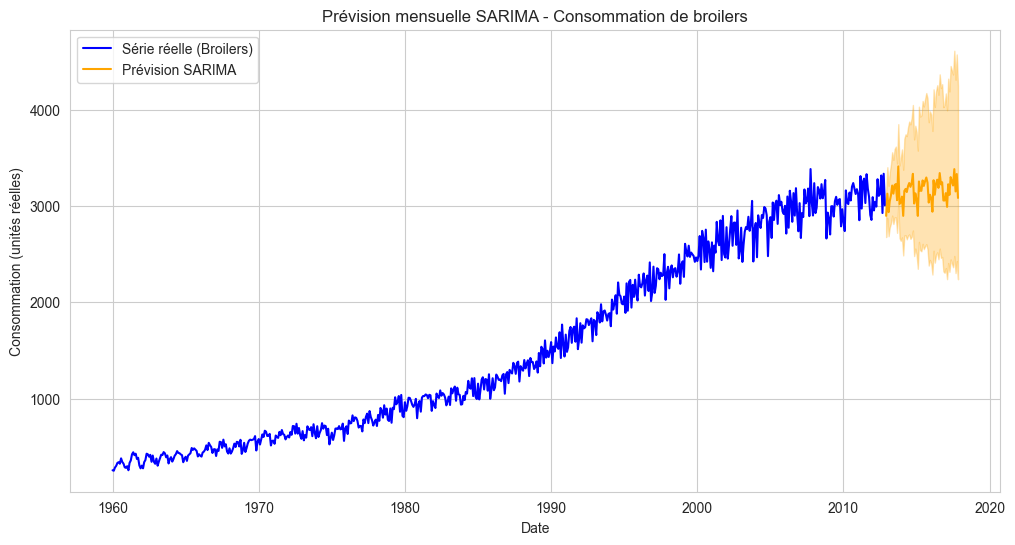

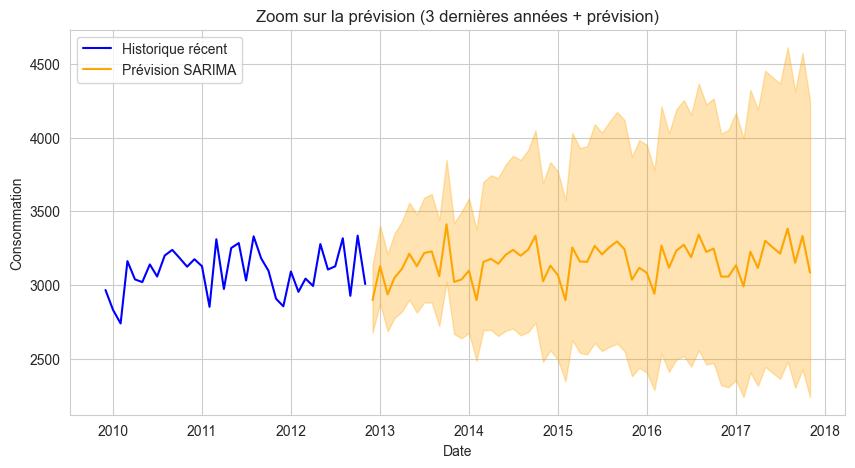

In [37]:
results_sarima, forecast_mean_exp, forecast_ci_exp = forecast_sarima(
    df['broilers'],
    steps=60,
    seasonal_period=12,
    title="Prévision mensuelle SARIMA - Consommation de broilers"
)


Le modèle SARIMA a appris comment la consommation de “broilers” (poulets) évolue dans le temps.
Il a compris qu’il y a une tendance générale et surtout une saisonnalité chaque année (par exemple des pics et des creux qui reviennent tous les 12 mois).

Le programme a testé plein de combinaisons possibles et a trouvé le meilleur modèle :
SARIMA(0,1,1)(2,1,2)[12]

Il tient compte de la tendance (les hausses et baisses globales), et de la saison (les cycles de 12 mois).

Paramètres du modèle SARIMA

| Position | Nom   | Signification                                                                                 | Exemple                                               |
|-----------|-------|----------------------------------------------------------------------------------------------|-------------------------------------------------------|
| 0         | p | Nombre de valeurs passées utilisées pour prédire la suivante (“combien de mois avant”).  | `p = 0` → il ne regarde aucun mois précédent.     |
| 1         | d | Nombre de différences appliquées pour rendre la série stationnaire (suppression tendance). | `d = 1` → il regarde les variations, pas les niveaux. |
| 2         | q | Nombre de valeurs d’erreur passées utilisées pour corriger la prévision.                 | `q = 1` → il ajuste selon l’erreur du mois précédent. |



| Position | Nom | Signification                                                             | Exemple                                                          |
|-----------|-----|---------------------------------------------------------------------------|------------------------------------------------------------------|
| 2         | P | Nombre de valeurs saisonnières passées prises en compte              | “Je me souviens de ce qui s’est passé 1 an et 2 ans avant.”       |
| 1         | D | Nombre de différences saisonnières (on retire les motifs répétitifs) | “Je retire la forme de l’année pour éviter de trop la répéter.”   |
| 2         | Q | Nombre d’erreurs saisonnières passées utilisées pour corriger la prévision | “Si j’ai mal prédit l’été dernier, j’apprends de ça.”             |
| [12]      | s | Longueur du cycle saisonnier (ici 12 mois = 1 an)                    | “Le cycle complet dure 1 an.”

Graphique :

courbe bleue = vraies données des dernières années.
courbe orange = prévision pour les années à venir.
zone orange pâle =  marge d’incertitude (plus large = moins sûr).

On voit que le modèle suit bien le comportement passé, prévoit une stabilité autour de 3000–3500 unités, garde la forme “en vagues” (les cycles saisonniers).

----


## 4. PROPHET

Après le modèle SARIMA, qui capture bien la tendance et la saisonnalité mais reste purement statistique, nous pouvons explorer une approche plus moderne et flexible : Prophet, développée par Meta (Facebook).

Prophet est conçu pour être simple à utiliser et robuste face aux variations réelles.
Il décompose automatiquement la série en trois composantes principales :

tendance (évolution à long terme),

saisonnalité (variations périodiques),

bruit / irrégularités.

Son principal avantage est de s’adapter facilement aux données complexes, tout en fournissant une prévision lisible et interprétable, avec des intervalles de confiance explicites.

In [38]:
from prophet import Prophet


In [41]:

def forecast_prophet(series, steps=60, title="Prévision Prophet - Broilers"):
    """
    Effectue une prévision complète avec Prophet :
    - Préparation de la série (format Prophet)
    - Entraînement du modèle Prophet
    - Prévision future
    - Visualisation avec intervalles de confiance
    """

    # Étape 1 : préparation des données
    series = series.dropna().astype(float)
    df_prophet = series.reset_index()
    df_prophet.columns = ['ds', 'y']  # Prophet exige ces noms

    # Étape 2 : entraînement du modèle Prophet
    print(" Entraînement du modèle Prophet...")
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='additive'
    )
    model.fit(df_prophet)

    # Étape 3 : création du futur
    future = model.make_future_dataframe(periods=steps, freq='M')  # prévision mensuelle
    forecast = model.predict(future)

    # Étape 4 : visualisation principale
    plt.figure(figsize=(12, 6))
    plt.plot(df_prophet['ds'], df_prophet['y'], label="Série réelle (Broilers)", color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label="Prévision Prophet", color='green')
    plt.fill_between(forecast['ds'],
                     forecast['yhat_lower'],
                     forecast['yhat_upper'],
                     color='lightgreen', alpha=0.4)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Consommation (unités réelles)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Étape 5 : zoom sur les dernières années
    plt.figure(figsize=(10, 5))
    plt.plot(df_prophet['ds'][-36:], df_prophet['y'][-36:], label="Historique récent", color='blue')
    plt.plot(forecast['ds'][-(steps + 36):], forecast['yhat'][-(steps + 36):], label="Prévision Prophet", color='green')
    plt.fill_between(forecast['ds'][-(steps + 36):],
                     forecast['yhat_lower'][-(steps + 36):],
                     forecast['yhat_upper'][-(steps + 36):],
                     color='lightgreen', alpha=0.4)
    plt.title("Zoom sur la prévision (3 dernières années + prévision)")
    plt.xlabel("Date")
    plt.ylabel("Consommation")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, forecast


 Entraînement du modèle Prophet...


16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1] done processing


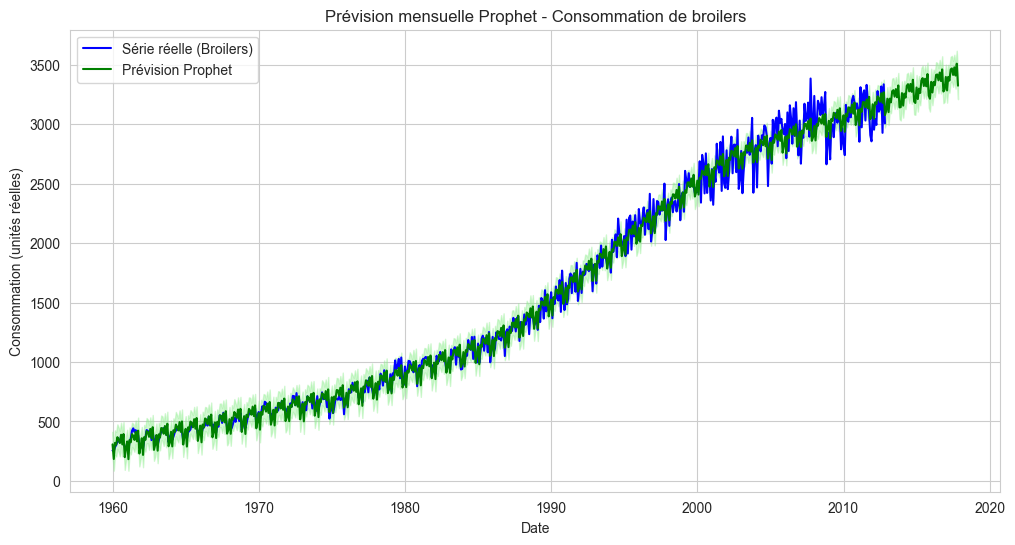

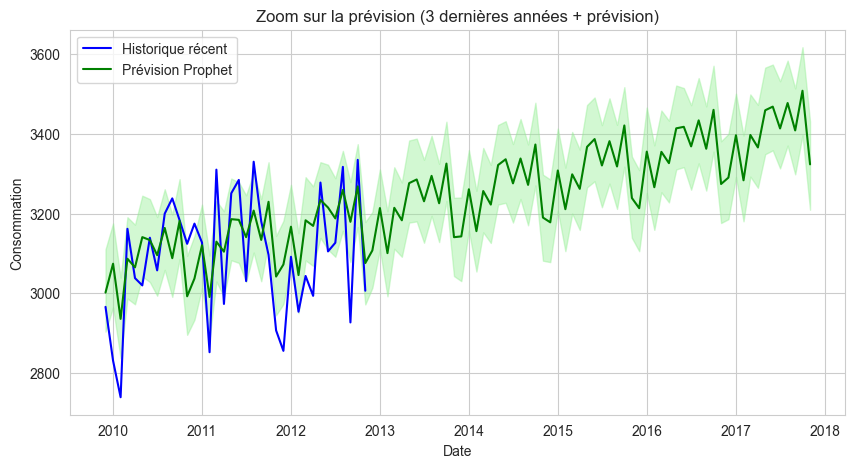

In [42]:
model_prophet, forecast_prophet_df = forecast_prophet(
    df['broilers'],
    steps=60,
    title="Prévision mensuelle Prophet - Consommation de broilers"
)


Le modèle suit très bien l’évolution historique : la consommation augmente régulièrement depuis 1960.

Prophet prévoit que cette hausse va continuer dans les années suivantes, mais plus lentement.

On observe une saisonnalité stable : chaque année, il y a des hausses et baisses régulières (cycles annuels).

L’incertitude augmente au fil du temps : plus la prévision est lointaine, moins elle est sûre.

RMSE